# Portugal Bank Dataset Model

Importing all libraries necessary for modelling  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('bank.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We do not have any missing values, so the data is cleaned.  

#### BASIC VISUALIZATION

In [5]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['y'] = le.fit_transform(df['y'])

In [7]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

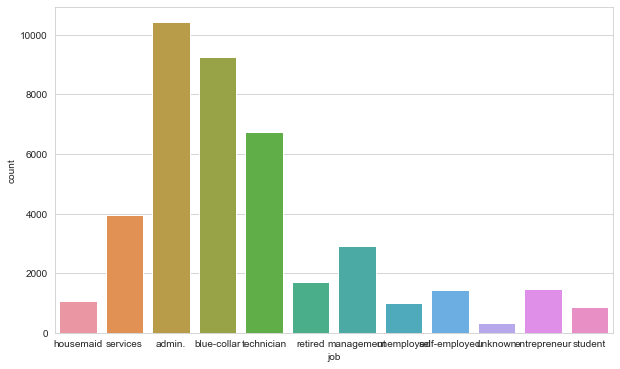

In [8]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(x = df['job'], data = df)

Job wise - A lot of citizens belong to 'Admin' category.  
Followed by 'Blue-collar' & 'Technician'.  

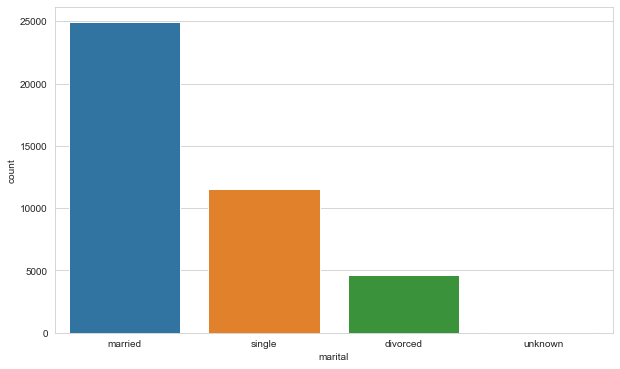

In [9]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(x = df['marital'], data = df)

Highest category in the marital status - 'Married' 

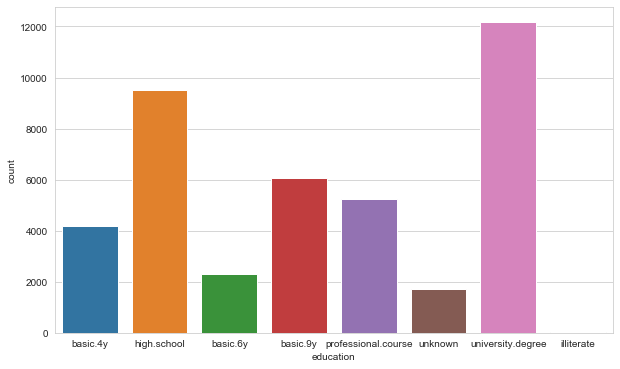

In [10]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(x = df['education'], data = df)

Education wise - Highest being 'University Degree' followed by 'High-School'

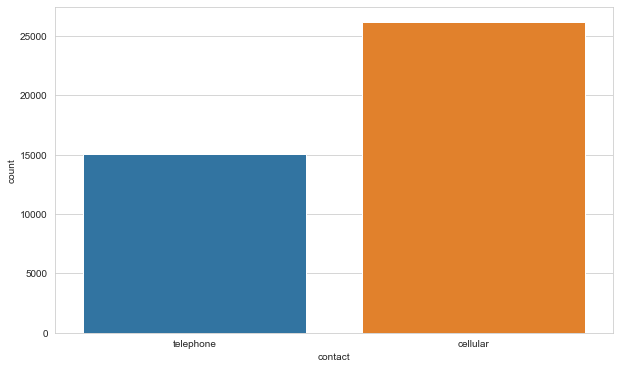

In [11]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(x = df['contact'], data = df)

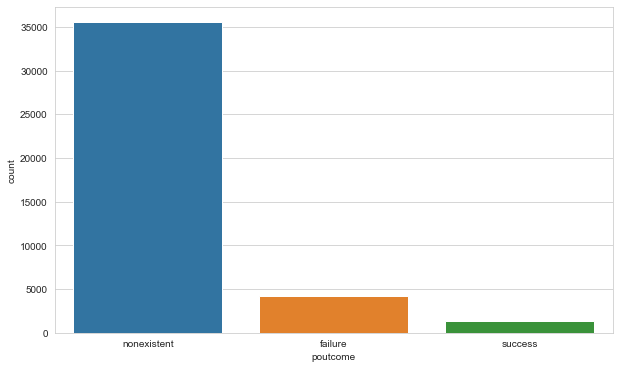

In [12]:
plt.figure(figsize = (10,6))
sns.set_style('whitegrid')
sns.countplot(x = df['poutcome'], data = df)

#### Numerical Values Data Exploration

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


##### LABEL ENCODER

Using Label Encoder to convert all categorical values to numeric ones.  
This will help in the modelling part later on.  

In [14]:
df['job'] = le.fit_transform(df['job'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])

In [15]:
df['marital'] = le.fit_transform(df['marital'])

In [16]:
df['poutcome'] = le.fit_transform(df['poutcome'])

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [79]:
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'euribor3m', 'nr.employed']]
y = df['y']

Splitting the data into two - Training Set & Testing Set  

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### BASE MODEL WITHOUT SCALING & FEATURE SELECTION - 

I will create a function that will take model & model name as inputs.  
This will ensure that I can use multiple models to check its accuracy score.  

All the below models, will be base models without any Feature Selection, Scaling or Optimization.  
This will give an idea as to how base models are performing & what's the target accuracy for each.  

In [81]:
cv = []
acc_train = []
acc_test = []

def bank_model(model, model_name):
    
    model.fit(X_train, y_train)
    
    # R2_Score for Train Set
    pred_train = model.predict(X_train)
    acc_train_model = accuracy_score(y_train, pred_train)
    acc_train.append(round(acc_train_model, 2))
    
    # R2_Score for Test Set
    pred_test = model.predict(X_test)
    acc_test_model = accuracy_score(y_test, pred_test)
    acc_test.append(round(acc_test_model,2))
    
    # R2 Mean of Train Set using Cross Val
    cross_val = cross_val_score(model, X_train, y_train, cv = 5)
    cv_mean = cross_val.mean()
    cv.append(round(cv_mean, 2))
    
    
    # R2 Mean of Train Set using Cross Val
    print("Train Acc_Score :", round(acc_train_model, 2))
    print("Test acc_Score :", round(acc_test_model, 2))
    print("Train CV Scores :", cross_val)
    print("Train CV Mean :", round(cv_mean, 2))

#### LOGISTIC REGRESSION MODEL

In [82]:
from sklearn.linear_model import LogisticRegression

logmod = LogisticRegression()

bank_model(logmod, "Logistic Regression")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Train Acc_Score : 0.91
Test acc_Score : 0.91
Train CV Scores : [0.90940819 0.90485584 0.90409712 0.9060698  0.91031866]
Train CV Mean : 0.91


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### DECISION TREE MODEL

In [83]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

bank_model(dtree, "Decision Tree")

Train Acc_Score : 1.0
Test acc_Score : 0.89
Train CV Scores : [0.88816388 0.88952959 0.88937785 0.89332322 0.89104704]
Train CV Mean : 0.89


#### RANDOM FOREST CLASSIFIER MODELS

In [84]:
from sklearn.ensemble import RandomForestClassifier

ranf = RandomForestClassifier()

bank_model(ranf, "RandomForestClassifier")

Train Acc_Score : 1.0
Test acc_Score : 0.91
Train CV Scores : [0.90834598 0.91016692 0.91623672 0.91320182 0.91729894]
Train CV Mean : 0.91


#### KNEIGBOURS CLASSIFIER MODEL

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

bank_model(knn, "KNN Classifier")

Train Acc_Score : 0.93
Test acc_Score : 0.9
Train CV Scores : [0.9060698  0.9016692  0.89772382 0.90136571 0.90804249]
Train CV Mean : 0.9


#### ADABOOST CLASSIFIER MODEL

In [86]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

bank_model(ada, "Ada Boost Classifier")

Train Acc_Score : 0.91
Test acc_Score : 0.91
Train CV Scores : [0.9060698  0.90955994 0.9060698  0.91122914 0.90819423]
Train CV Mean : 0.91


#### XGB CLASSIFIER MODEL

In [87]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

bank_model(xgb, "XGB Classifier")

Train Acc_Score : 0.96
Test acc_Score : 0.92
Train CV Scores : [0.91441578 0.91198786 0.91259484 0.91335357 0.91532625]
Train CV Mean : 0.91


In [88]:
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 
               'Adaboost', 'XGB Classifier']
scores = pd.DataFrame({'Models':model_names, 'Accuracy_Train':acc_train, 'Accuracy_Test':acc_test})
scores

,Models,Accuracy_Train,Accuracy_Test
0,Logistic Regression,0.91,0.91
1,Decision Tree Classifier,1.00,0.89
2,Random Forest Classifier,1.00,0.91
3,KNN,0.93,0.90
4,Adaboost,0.91,0.91
5,XGB Classifier,0.96,0.92


I tried & tested multiple base models on the given datasets and as seen in the above tabular data -  
XGB Classifier is having a good accuracy score of 96% on Train & 92% on Test.  
Followed by, Random Forest Classifier, Adaboost & Logistic Regression having avg 91% score on Train & Test dataset.  

#### MODEL PREDICTION WITH FEATURE SELECTION

I will try & test feature selection methods -   
1. SelectKBest    

In [89]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Applying SelectKBest to extract top 10 features
bestfeats = SelectKBest(score_func = f_classif, k = 12)

fit = bestfeats.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

feature_scores = pd.concat([dfcolumns, df_scores], axis = 1)
feature_scores.columns = ['Specs', 'Scores']

print(feature_scores.nlargest(12, 'Scores'))

             Specs       Scores
10        duration  8094.101634
18     nr.employed  5926.610601
12           pdays  4861.173272
17       euribor3m  4309.479048
15    emp.var.rate  4023.829925
13        previous  2304.257088
7          contact   881.707070
16  cons.price.idx   778.589795
14        poutcome   705.678164
4          default   410.590785
11        campaign   182.156673
3        education   138.051756


In [91]:
new_df = df.copy()

Discarding rest of the features from our dataset & only keeping those for which scores were good.  

In [92]:
X = new_df[[ 'education', 'default',
       'contact', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
        'euribor3m', 'nr.employed']]
y = new_df['y']

In [109]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Applying SMOTE Analysis to balance our data, as the target variable is imbalanced.  

In [93]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X,y=smt.fit_resample(X,y)

##### STANDARD SCALER

Applying Standard Scaling to normalize our data

In [94]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()

new_df[['duration', 'pdays', 'cons.price.idx', 'euribor3m', 'nr.employed']] = scaled.fit_transform(
    new_df[['duration', 'pdays', 'cons.price.idx', 'euribor3m', 'nr.employed']])

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [100]:
new_cv = []
new_acc_train = []
new_acc_test = []

def bank_model(model, model_name):
    
    model.fit(X_train, y_train)
    
    # R2_Score for Train Set
    pred_train = model.predict(X_train)
    acc_train_model = accuracy_score(y_train, pred_train)
    new_acc_train.append(round(acc_train_model, 2))
    
    # R2_Score for Test Set
    pred_test = model.predict(X_test)
    acc_test_model = accuracy_score(y_test, pred_test)
    new_acc_test.append(round(acc_test_model,2))
    
    # R2 Mean of Train Set using Cross Val
    cross_val = cross_val_score(model, X_train, y_train, cv = 5)
    cv_mean = cross_val.mean()
    new_cv.append(round(cv_mean, 2))
    
    
    # R2 Mean of Train Set using Cross Val
    print("Train Acc_Score :", round(acc_train_model, 2))
    print("Test acc_Score :", round(acc_test_model, 2))
    print("Train CV Scores :", cross_val)
    print("Train CV Mean :", round(cv_mean, 2))

#### LOGISTIC REGRESSION MODEL

In [101]:
from sklearn.linear_model import LogisticRegression

new_logmod = LogisticRegression()

bank_model(new_logmod, "Logistic Regression")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Train Acc_Score : 0.87
Test acc_Score : 0.87
Train CV Scores : [0.87021204 0.87079949 0.8761009  0.86891834 0.87439077]
Train CV Mean : 0.87


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### DECISION TREE CLASSIFIER

In [102]:
from sklearn.tree import DecisionTreeClassifier

new_dtree = DecisionTreeClassifier()

bank_model(new_dtree, "Decision Tree")

Train Acc_Score : 1.0
Test acc_Score : 0.93
Train CV Scores : [0.9253591  0.92740487 0.92697734 0.92552373 0.92808893]
Train CV Mean : 0.93


#### RANDOM FOREST CLASSIFIER

In [103]:
from sklearn.ensemble import RandomForestClassifier

new_ranf = RandomForestClassifier()

bank_model(new_ranf, "RandomForestClassifier")

Train Acc_Score : 1.0
Test acc_Score : 0.94
Train CV Scores : [0.94451094 0.94185549 0.94741342 0.94082941 0.94681488]
Train CV Mean : 0.94


#### KNEIGHBOURS CLASSIFIER

In [104]:
from sklearn.neighbors import KNeighborsClassifier

new_knn = KNeighborsClassifier()

bank_model(new_knn, "KNN Classifier")

Train Acc_Score : 0.93
Test acc_Score : 0.91
Train CV Scores : [0.90218878 0.90466011 0.90679778 0.90431808 0.91038906]
Train CV Mean : 0.91


#### ADABOOST CLASSIFIER

In [105]:
from sklearn.ensemble import AdaBoostClassifier

new_ada = AdaBoostClassifier()

bank_model(new_ada, "Ada Boost Classifier")

Train Acc_Score : 0.9
Test acc_Score : 0.9
Train CV Scores : [0.89466484 0.89020949 0.90183839 0.89226165 0.89585293]
Train CV Mean : 0.89


#### XGB CLASSIFIER

In [106]:
from xgboost import XGBClassifier

new_xgb = XGBClassifier()

bank_model(new_xgb, "XGB Classifier")

Train Acc_Score : 0.96
Test acc_Score : 0.94
Train CV Scores : [0.94322845 0.94082941 0.94536127 0.93775118 0.9471569 ]
Train CV Mean : 0.94


### COMPARING MODELS & ACCURACY SCORE

In [107]:
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'Adaboost', 'XGB Classifier']
new_scores = pd.DataFrame({'Models':model_names, 'Accuracy_Train':acc_train, 'Accuracy_Test':acc_test, 'New_Train_Accuracy':new_acc_train,
                      'New_Test_Accuracy':new_acc_test})
new_scores

,Models,Accuracy_Train,Accuracy_Test,New_Train_Accuracy,New_Test_Accuracy
0,Logistic Regression,0.91,0.91,0.87,0.87
1,Decision Tree Classifier,1.00,0.89,1.00,0.93
2,Random Forest Classifier,1.00,0.91,1.00,0.94
3,KNN,0.93,0.90,0.93,0.91
4,Adaboost,0.91,0.91,0.90,0.90
5,XGB Classifier,0.96,0.92,0.96,0.94


We have improved our Test Accuracy quite a bit after Feature Selection, SMOTE Analysis & Standard Scaling.  
Using these three, we can see improvement in the new models compared to base models.  
Out of all models, we have good scores on XGB Classifier & Random Forest Classifiers.  